# Rishik  Reddy   Bandi
# 220968300
# Week3 Polynomial Rgression on  WineQuality 

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data = pd.read_csv('wineQT.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [35]:
X = data[['alcohol']]
X

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4
...,...
1138,11.0
1139,9.5
1140,10.5
1141,11.2


In [36]:
y = data['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

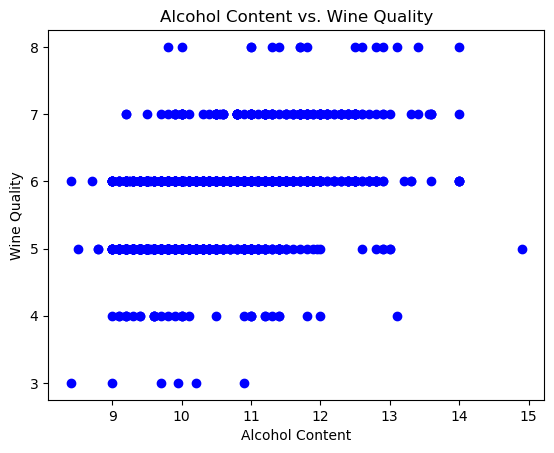

In [37]:
plt.scatter(X, y, color='blue')
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


polyregs = PolynomialFeatures(degree=2)
X_train_poly = polyregs.fit_transform(X_train)
X_test_poly = polyregs.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)


y_pred = model.predict(X_test_poly)

In [39]:
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

equation = f'Equation: y = {intercept:.2f}'

for i in range(1, len(coefficients)):
    equation += f' + {coefficients[i]:.2f} * x^{i}'

print(equation)

Coefficients: [ 0.          1.02134839 -0.03015579]
Intercept: -1.6906678760869136
Equation: y = -1.69 + 1.02 * x^1 + -0.03 * x^2


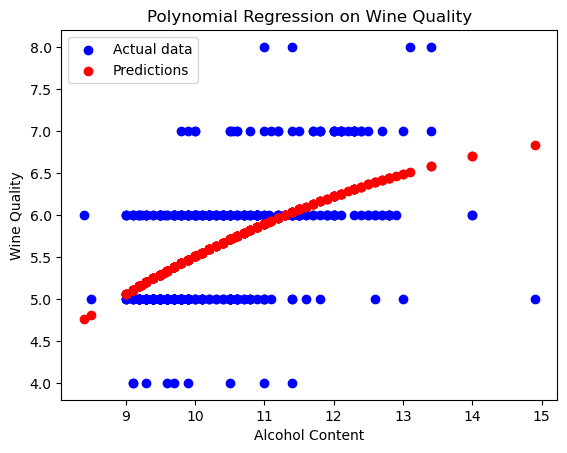

In [40]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.scatter(X_test, y_pred, color='red', label='Predictions')
plt.title('Polynomial Regression on Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.legend()
plt.show()

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5235711064459946
Mean Squared Error: 0.42117176068909407
Root Mean Squared Error: 0.6489774731753746
